In [1]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
!pip show xgboost

Name: xgboost
Version: 1.3.1
Summary: XGBoost Python Package
Home-page: https://github.com/dmlc/xgboost
Author: None
Author-email: None
License: Apache-2.0
Location: d:\anaconda3\lib\site-packages
Requires: numpy, scipy
Required-by: 


In [3]:
import json
import pickle
import pandas as pd

In [4]:
xgb_model = pickle.load(open('xgb_model_param.pickle','rb'))

[16:46:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:350: Loading from a raw memory buffer on CPU only machine.  Changing tree_method to hist.
[16:46:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:222: No visible GPU is found, setting `gpu_id` to -1


In [6]:
importance = xgb_model.get_fscore(fmap=r'xgb.fmap')

AttributeError: 'XGBClassifier' object has no attribute 'get_fscore'

In [5]:
xgb_model.feature_importances_.shape

(140,)

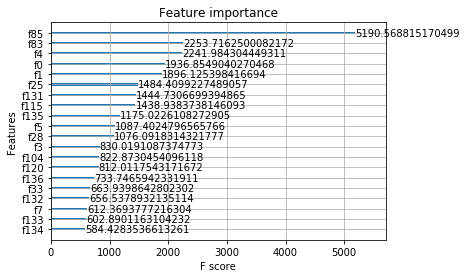

In [31]:
plot_importance(xgb_model,max_num_features=20, importance_type='gain')

In [25]:
sku_cols = ['sku_id',
'ownertype',
'shoptype',
'regularprice',
'salemode',
'productinfotype',
'jiupishoptype',
'first_display_category',
'second_display_category',
'first_online_date_offset',
'current_saleable_inventory',
'create_day_totalamount',
'create_day_payamount',
'create_day_usercount',
'create_day_ordercount',
'create_month_totalamount',
'create_month_payamount',
'create_month_auditamount',
'create_month_costamount',
'create_month_statcount',
'create_month_usercount',
'create_month_ordercount',
'create_last_7_totalamount',
'create_last_7_payamount',
'create_last_7_auditamount',
'create_last_7_costamount',
'create_last_7_statcount',
'create_last_7_auditstatcount',
'create_last_7_usercount',
'create_last_7_ordercount',
'create_last_15_totalamount',
'create_last_15_payamount',
'create_last_15_auditamount',
'create_last_15_costamount',
'create_last_15_statcount',
'create_last_15_auditstatcount',
'create_last_15_usercount',
'create_last_15_ordercount',
'create_last_30_totalamount',
'create_last_30_payamount',
'create_last_30_auditamount',
'create_last_30_discountamount',
'create_last_30_statcount',
'create_last_30_auditstatcount',
'create_last_30_usercount',
'create_last_30_ordercount',
'complete_last_order_completetime_offset',
'complete_day_totalamount',
'complete_day_payamount',
'complete_day_auditamount',
'complete_day_costamount',
'complete_day_statcount',
'complete_day_auditstatcount',
'complete_day_usercount',
'complete_day_ordercount',
'complete_month_totalamount',
'complete_month_payamount',
'complete_month_auditamount',
'complete_month_costamount',
'complete_month_statcount',
'complete_month_usercount',
'complete_month_ordercount',
'complete_last_7_totalamount',
'complete_last_7_payamount',
'complete_last_7_auditamount',
'complete_last_7_costamount',
'complete_last_7_statcount',
'complete_last_7_auditstatcount',
'complete_last_7_usercount',
'complete_last_7_ordercount',
'complete_last_15_totalamount',
'complete_last_15_payamount',
'complete_last_15_auditamount',
'complete_last_15_costamount',
'complete_last_15_statcount',
'complete_last_15_usercount',
'complete_last_15_ordercount',
'complete_last_30_payamount',
'complete_last_30_auditamount',
'complete_last_30_costamount',
'complete_last_30_usercount',
'complete_last_30_ordercount']

user_cols = ['user_id',
'bizuserlevel',
'bizuserdisplayclass',
'ispassauth',
'addsourcetype',
'registersource',
'isbiggoodsuser',
'isagencyuser',
'is_diamond',
'first_create_time_offset',
'bizuser_total_amount',
'order_pay_amount',
'order_discount_amount',
'avg_month_ordercounts',
'avg_month_amount',
'last_month_total_amount',
'last_month_order_counts',
'last_month_day_count',
'last_month_stat_count',
'this_month_total_amount',
'this_month_order_counts',
'this_month_day_count',
'this_month_stat_count',
'this_month_customer_unit_price',
'last_7_total_amount',
'last_7_stat_count',
'last_7_customer_unit_price',
'last_15_total_amount',
'last_15_stat_count',
'last_15_day_count',
'last_15_order_count',
'last_15_customer_unit_price',
'last_30_total_amount',
'last_30_stat_count',
'last_30_day_count',
'last_30_sku_count',
'last_30_order_count',
'jiupi_scan_sku_count',
'first_category_count',
'second_category_count',
'sku_cover',
'all_count',
'ave_month_sku_cover',
'ave_order_sku',
'food_and_goods_order',
'food_and_goods_amount',
'food_and_goods_count',
'food_and_goods_sku_count',
'grain_and_oil_amount',
'grain_and_oil_count',
'grain_and_oil_sku_count',
'total_login',
'active_days',
'month_avg_days',
'morning_active_days',
'afternoon_active_days',
'night_active_days',
'last_month_active_days',
'twenty_four_hour_not_receiving',
'user_rfm_type']
cols = sku_cols[1:]+user_cols[1:]

In [27]:
len(sku_cols),len(user_cols),len(cols)

(82, 60, 140)

In [29]:
scores = pd.Series(xgb_model.feature_importances_,index=cols)

In [34]:
scores = scores.sort_values(ascending=False)

In [35]:
scores.head()

registersource     0.099359
ispassauth         0.043141
productinfotype    0.042917
ownertype          0.037076
shoptype           0.036296
dtype: float32

In [44]:
cols.index('registersource'),cols.index('ispassauth')

(85, 83)

In [39]:
scores_top50 = scores.nlargest(50)
scores_top50.head(), scores_top50.shape

(registersource     0.099359
 ispassauth         0.043141
 productinfotype    0.042917
 ownertype          0.037076
 shoptype           0.036296
 dtype: float32, (50,))

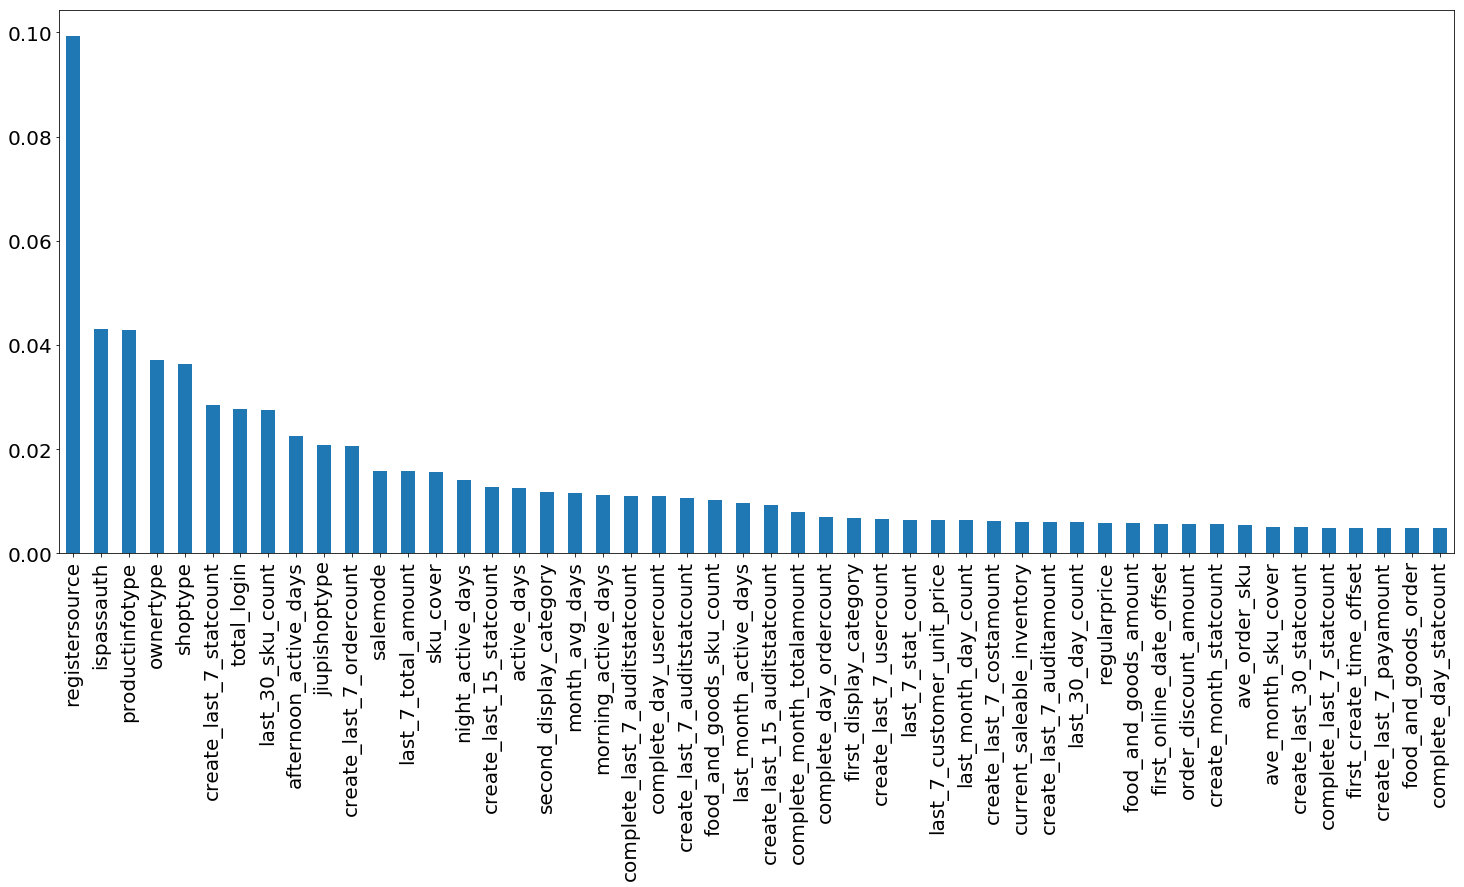

In [51]:
plt.figure(figsize=(25,10))
scores_top50.plot.bar(fontsize=20)

In [5]:
with open('feat_250.txt','r') as f1 ,open('feat_254.txt','r') as f2:
    feat250 = f1.readlines()
    feat254 = f2.readlines()
    
feat250 = [s.strip() for s in feat250]
feat254 = [s.strip() for s in feat254]

In [7]:
len(feat250), len(feat254)

(250, 254)

In [11]:
set(feat254).difference(set(feat250))

{'firstonlinedate',
 'lastaddordertime',
 'lastcompleteordertime',
 'maxunitprice',
 'originalplace',
 'reduceprice',
 'regularprice',
 'regularpriceunit',
 'speinfomaxunit'}

# 新模型效果分析

In [4]:
xgb_model = pickle.load(open('xgb_model_param_new.pickle','rb'))

[09:19:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:350: Loading from a raw memory buffer on CPU only machine.  Changing tree_method to hist.
[09:19:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:222: No visible GPU is found, setting `gpu_id` to -1


In [5]:
columns = ['model',
 'os',
 'carrier',
 'lastaddordertime_diff',
 'lastcompleteordertime_diff',
 'lastcompleteorderamount',
 'user_rfm_type_id',
 'user_life_cycle_id',
 'wine_not_beer_count_rate',
 'wine_not_beer_count',
 'wine_not_beer_rate',
 'wine_not_beer_amount',
 'drink_and_beer_count_rate',
 'drink_and_beer_count', 'drink_and_beer_rate',
 'drink_and_beer_amount',
 'food_and_goods_count',
 'food_and_goods_count_rate',
 'food_and_goods_rate',
 'food_and_goods_amount', 'grain_and_oil_count', 'grain_and_oil_count_rate', 'grain_and_oil_rate',
 'grain_and_oil_amount',
 'famous_wine_rate',
 'famous_wine_amount',
 'famous_wine_count_rate',
 'famous_wine_count',
 'active_days',
 'today_whether_login',
 'is_vip',
 'register_days',
 'first_display_category_id',
 'firstonlinedate_diff',
 'supportawardexchange',
 'shelflifelongtime',
 'shelflife',
 'statisticsgroup',
 'minunitprice',
 'create_last_30_reduce_product_amount',
 'profit_rate',
 'cost_price',
 'item_gross_profit',
 'last_7_visit_counts',
 'last_7_visit_users',
 'last_7_ex_users',
 'create_last_7_usercount',
 'create_last_7_statcount',
 'current_saleable_inventory',
 'current_inventory',
 'shoppingcar_productsku_piece',
 'shoppingcar_productsku_amount',
 'shoppingcar_user_count',
 'terminal_penetration',
 'complete_last_7_grossprofitrate',
 'complete_last_7_usercount',
 'complete_last_7_totalamount',
 'complete_last_7_statcount',
 'user_behavior_num',
 'user_total_std',
 'user_total_mean',
 'user_sku_id_nunique',
 'user_model_nunique',
 'user_os_nunique',
 'user_carrier_nunique',
 'user_shop_id_nunique',
 'user_brand_id_nunique',
 'user_first_display_category_id_nunique',
 'user_statisticsgroup_nunique',
 'user_type_0_count',
 'user_type_1_count',
 'user_type_2_count',
 'user_duration',
 'user_diff_hours',
 'user_type_0_std',
 'user_type_0_mean',
 'user_type_1_std',
 'user_type_1_mean',
 'user_type_2_std',
 'user_type_2_mean',
 'user_type_0_ratio',
 'user_type_2_ratio',
 'sku_behavior_num',
 'sku_total_std',
 'sku_total_mean',
 'sku_user_id_nunique',
 'sku_user_cityid_nunique',
 'sku_model_nunique',
 'sku_os_nunique',
 'sku_carrier_nunique',
 'sku_type_0_count',
 'sku_type_1_count',
 'sku_type_2_count',
 'sku_duration',
 'sku_diff_hours',
 'sku_type_0_std',
 'sku_type_0_mean',
 'sku_type_1_std',
 'sku_type_1_mean',
 'sku_type_2_std',
 'sku_type_2_mean',
 'sku_type_0_ratio',
 'sku_type_2_ratio',
 'shop_behavior_num',
 'shop_total_std',
 'shop_total_mean',
 'shop_user_id_nunique',
 'shop_user_cityid_nunique',
 'shop_model_nunique',
 'shop_os_nunique',
 'shop_carrier_nunique',
 'shop_brand_id_nunique',
 'shop_first_display_category_id_nunique',
 'shop_statisticsgroup_nunique',
 'shop_type_0_count',
 'shop_type_1_count',
 'shop_type_2_count',
 'shop_duration',
 'shop_diff_hours',
 'shop_type_0_std',
 'shop_type_0_mean',
 'shop_type_1_std',
 'shop_type_1_mean',
 'shop_type_2_std',
 'shop_type_2_mean',
 'shop_type_0_ratio',
 'shop_type_2_ratio',
 'brand_behavior_num',
 'brand_total_std',
 'brand_total_mean',
 'brand_user_id_nunique',
 'brand_user_cityid_nunique',
 'brand_model_nunique',
 'brand_os_nunique',
 'brand_carrier_nunique',
 'brand_shop_id_nunique',
 'brand_first_display_category_id_nunique',
 'brand_statisticsgroup_nunique',
 'brand_type_0_count',
 'brand_type_1_count',
 'brand_type_2_count',
 'brand_duration',
 'brand_diff_hours',
 'brand_type_0_std',
 'brand_type_0_mean',
 'brand_type_1_std',
 'brand_type_1_mean',
 'brand_type_2_std',
 'brand_type_2_mean',
 'brand_type_0_ratio',
 'brand_type_2_ratio',
 'u_shop_behavior_num',
 'u_shop_total_std',
 'u_shop_total_mean',
 'u_shop_sku_id_nunique',
 'u_shop_model_nunique',
 'u_shop_os_nunique',
 'u_shop_carrier_nunique',
 'u_shop_brand_id_nunique',
 'u_shop_first_display_category_id_nunique',
 'u_shop_statisticsgroup_nunique',
 'u_shop_type_0_count',
 'u_shop_type_1_count',
 'u_shop_type_2_count',
 'u_shop_duration',
 'u_shop_diff_hours',
 'u_shop_type_0_std',
 'u_shop_type_0_mean',
 'u_shop_type_1_std',
 'u_shop_type_1_mean',
 'u_shop_type_2_std',
 'u_shop_type_2_mean',
 'u_shop_type_0_ratio',
 'u_shop_type_2_ratio',
 'u_brand_behavior_num',
 'u_brand_total_std',
 'u_brand_total_mean',
 'u_brand_sku_id_nunique',
 'u_brand_model_nunique',
 'u_brand_os_nunique',
 'u_brand_carrier_nunique',
 'u_brand_shop_id_nunique',
 'u_brand_first_display_category_id_nunique',
 'u_brand_statisticsgroup_nunique',
 'u_brand_type_0_count',
 'u_brand_type_1_count',
 'u_brand_type_2_count',
 'u_brand_duration',
 'u_brand_diff_hours',
 'u_brand_type_0_std',
 'u_brand_type_0_mean',
 'u_brand_type_1_std',
 'u_brand_type_1_mean',
 'u_brand_type_2_std',
 'u_brand_type_2_mean',
 'u_brand_type_0_ratio',
 'u_brand_type_2_ratio',
 'u_cate_behavior_num',
 'u_cate_total_std',
 'u_cate_total_mean',
 'u_cate_sku_id_nunique',
 'u_cate_model_nunique',
 'u_cate_os_nunique',
 'u_cate_carrier_nunique',
 'u_cate_shop_id_nunique',
 'u_cate_brand_id_nunique',
 'u_cate_statisticsgroup_nunique',
 'u_cate_type_0_count',
 'u_cate_type_1_count',
 'u_cate_type_2_count',
 'u_cate_duration',
 'u_cate_diff_hours',
 'u_cate_type_0_std',
 'u_cate_type_0_mean',
 'u_cate_type_1_std',
 'u_cate_type_1_mean',
 'u_cate_type_2_std',
 'u_cate_type_2_mean',
 'u_cate_type_0_ratio',
 'u_cate_type_2_ratio',
 'u_category_behavior_num',
 'u_category_total_std',
 'u_category_total_mean',
 'u_category_sku_id_nunique',
 'u_category_model_nunique',
 'u_category_os_nunique',
 'u_category_carrier_nunique',
 'u_category_shop_id_nunique',
 'u_category_brand_id_nunique',
 'u_category_first_display_category_id_nunique',
 'u_category_type_0_count',
 'u_category_type_1_count',
 'u_category_type_2_count',
 'u_category_duration',
 'u_category_diff_hours',
 'u_category_type_0_std',
 'u_category_type_0_mean',
 'u_category_type_1_std',
 'u_category_type_1_mean',
 'u_category_type_2_std',
 'u_category_type_2_mean',
 'u_category_type_0_ratio',
 'u_category_type_2_ratio']

In [6]:
scores = pd.Series(xgb_model.feature_importances_,index=columns)

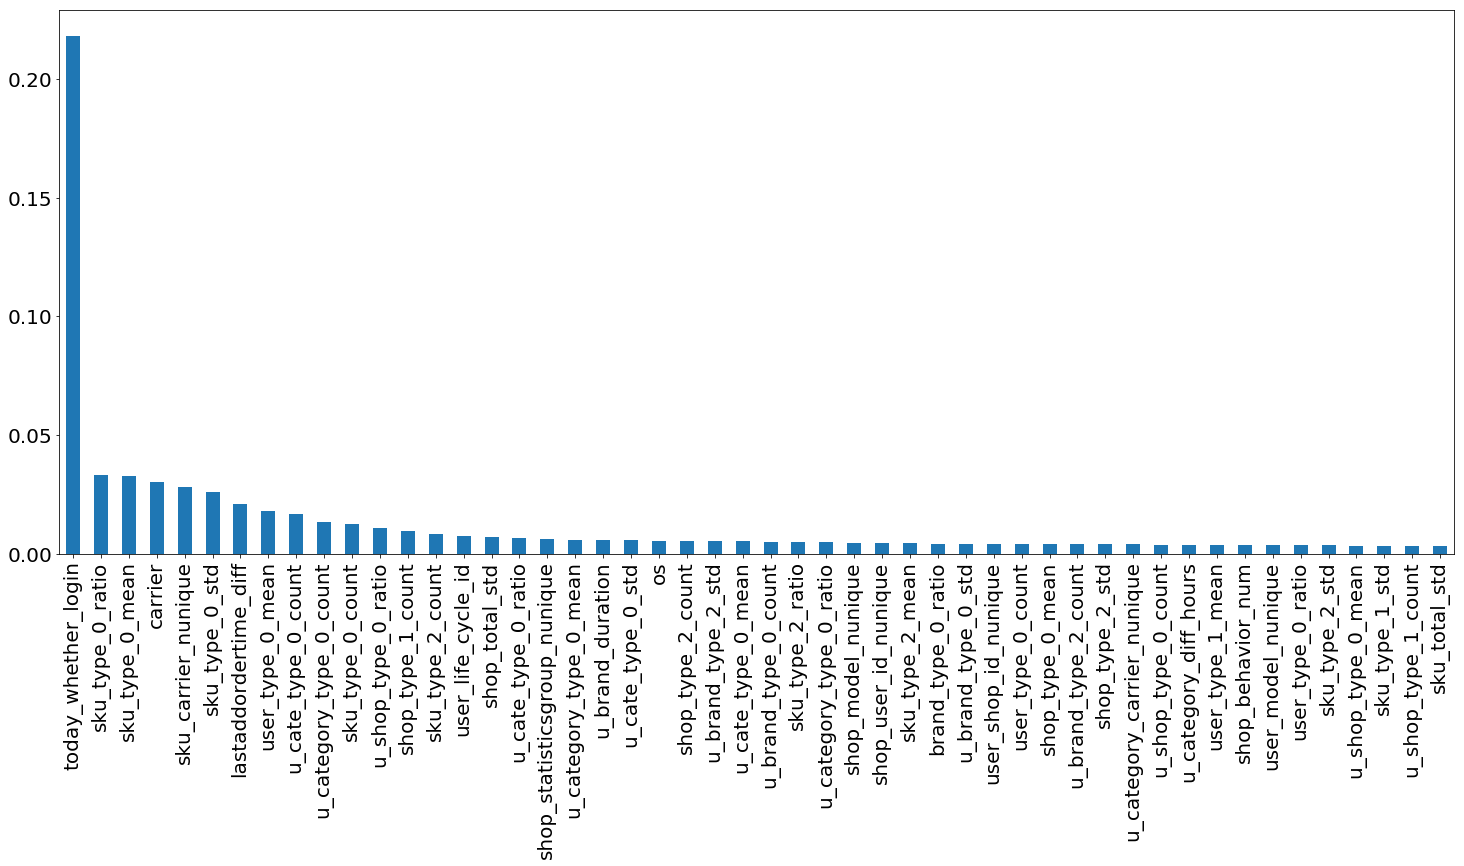

In [7]:
scores_top50 = scores.nlargest(50)
scores_top50.head(), scores_top50.shape
plt.figure(figsize=(25,10))
scores_top50.plot.bar(fontsize=20)

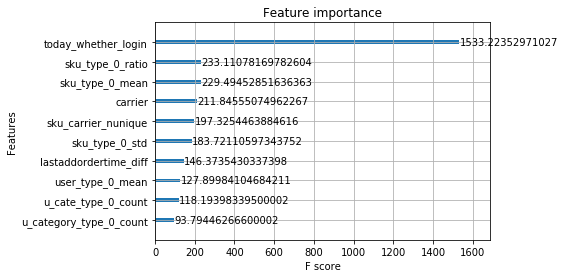

In [8]:
xgb.plot_importance(xgb_model,max_num_features=10,importance_type='gain')

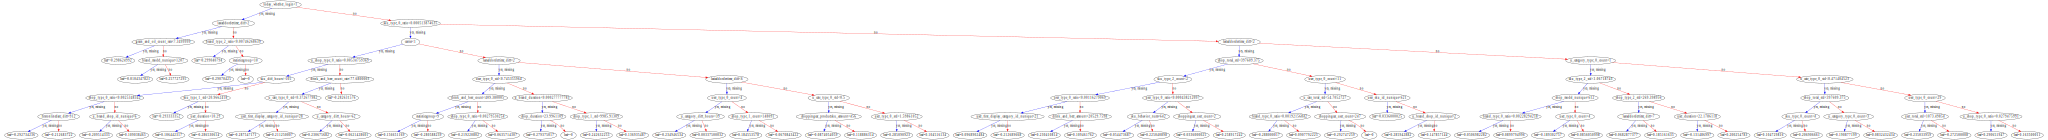

In [10]:
xgb.to_graphviz(xgb_model, num_trees=0)

In [11]:
xgb_model.get_booster().get_score(importance_type=importance_type)

{'today_whether_login': 37,
 'lastaddordertime_diff': 123,
 'grain_and_oil_count_rate': 70,
 'brand_model_nunique': 23,
 'brand_type_2_ratio': 58,
 'statisticsgroup': 10,
 'sku_type_0_ratio': 69,
 'carrier': 53,
 'u_shop_type_0_ratio': 55,
 'sku_diff_hours': 66,
 'shop_type_0_ratio': 76,
 'firstonlinedate_diff': 76,
 'u_brand_shop_id_nunique': 14,
 'sku_type_1_std': 34,
 'user_duration': 118,
 'drink_and_beer_count_rate': 71,
 'u_cate_type_0_std': 10,
 'user_first_display_category_id_nunique': 63,
 'u_category_diff_hours': 10,
 'user_type_0_std': 43,
 'drink_and_beer_count': 59,
 'u_brand_duration': 104,
 'shop_duration': 37,
 'shop_type_1_std': 22,
 'user_type_0_count': 39,
 'shop_type_1_count': 5,
 'shoppingcar_productsku_amount': 57,
 'shop_total_std': 45,
 'sku_type_2_count': 49,
 'user_type_0_ratio': 90,
 'drink_and_beer_amount': 74,
 'sku_behavior_num': 40,
 'shoppingcar_user_count': 35,
 'u_cate_total_std': 48,
 'brand_type_0_ratio': 78,
 'user_sku_id_nunique': 73,
 'u_category_